C:\Users\mohammed luqmaan\AppData\Local\Temp\ipykernel_26476\3330129871.py:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_orig, speech = wavfile.read('BAK.wav')


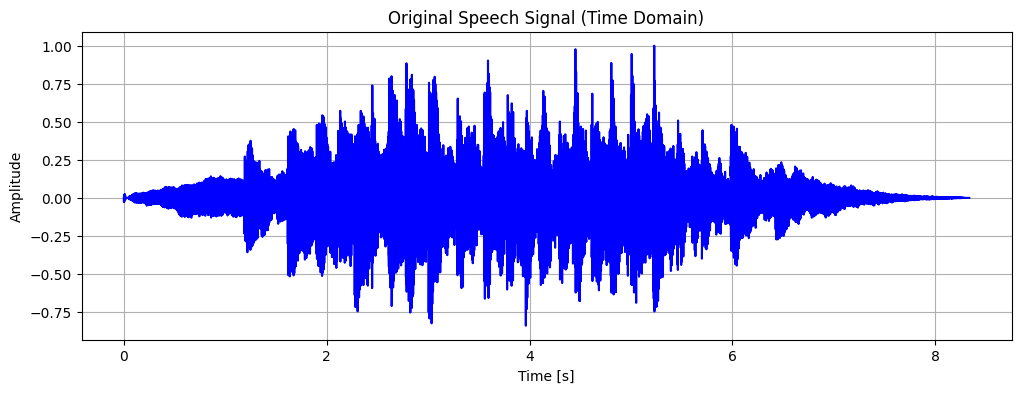

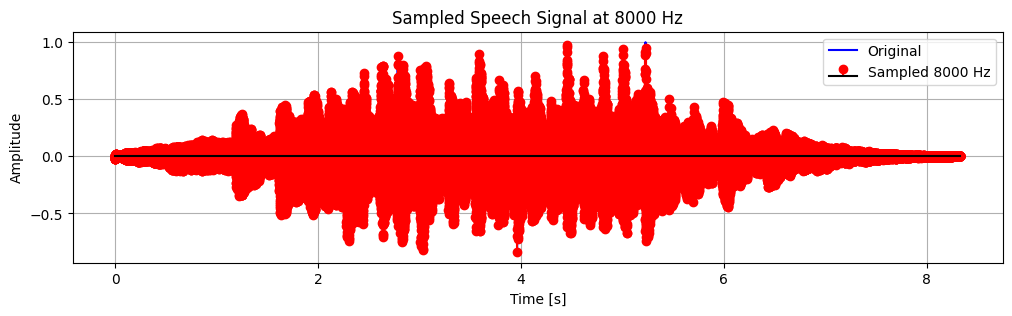

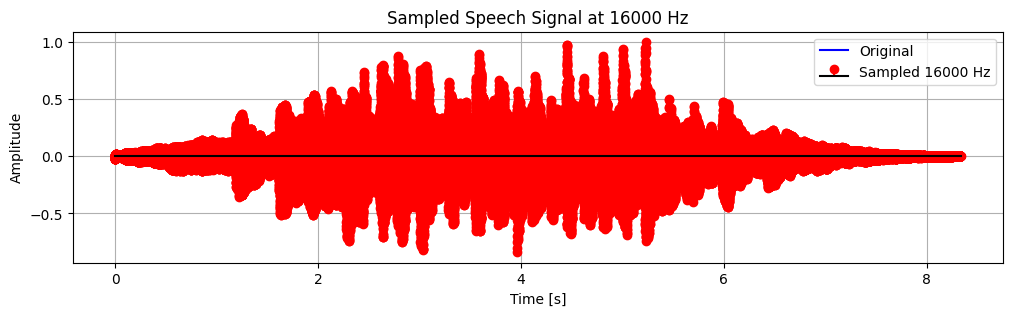

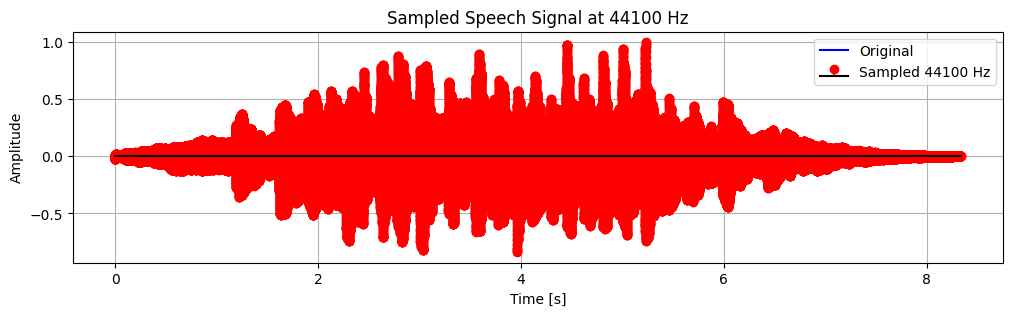

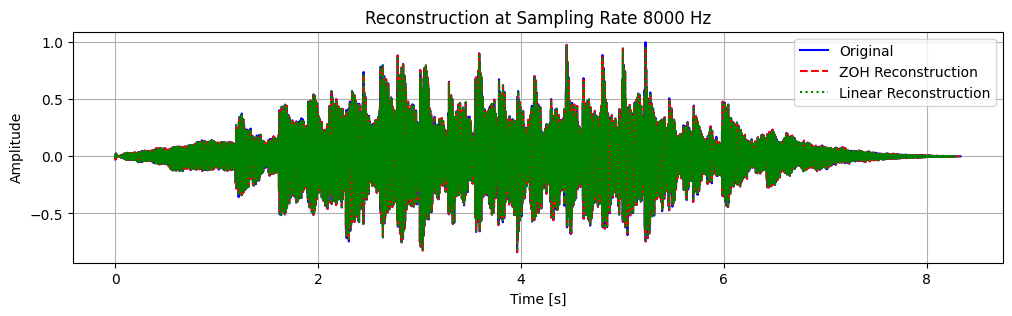

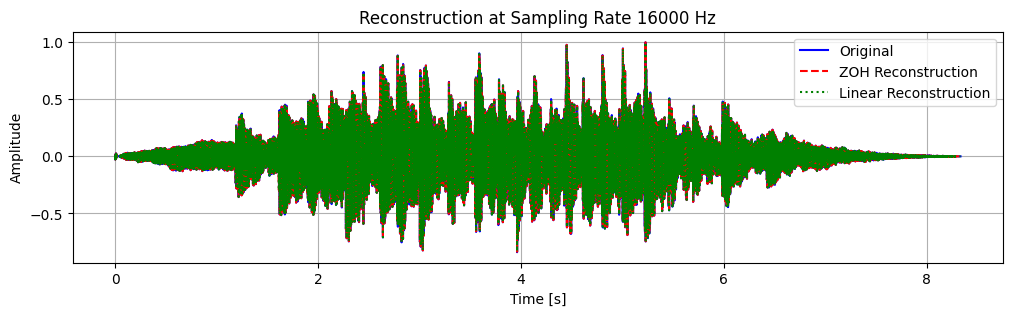

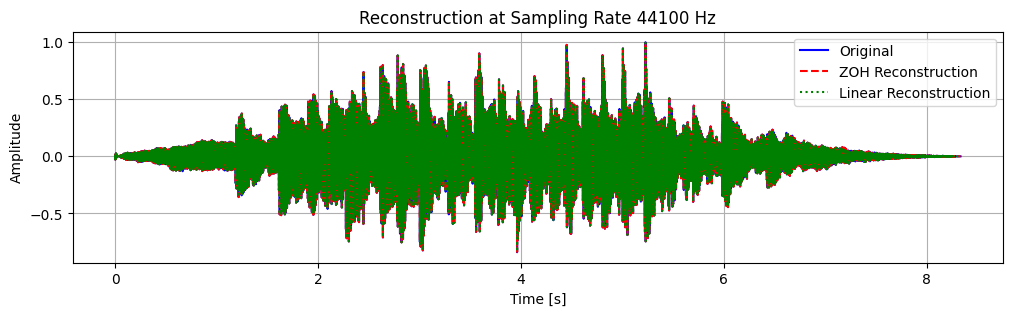

Mean Squared Error (MSE) for Reconstructed Signals:
Sampling Rate 8000 Hz: ZOH MSE = 0.000152, Linear MSE = 0.000014
Sampling Rate 16000 Hz: ZOH MSE = 0.000038, Linear MSE = 0.000002
Sampling Rate 44100 Hz: ZOH MSE = 0.000008, Linear MSE = 0.000000

Inference:
1. Higher sampling rates produce lower MSE and better reconstruction quality.
2. Linear interpolation generally performs better than zero-order hold (ZOH).
3. Lower sampling rates distort the speech signal, increasing error and reducing clarity.


In [2]:
# Lab 1: Speech Signal Sampling and Reconstruction

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

# -----------------------------
# Step 0: Load Speech Signal
# -----------------------------
# Replace 'speech.wav' with your speech file
fs_orig, speech = wavfile.read('BAK.wav')

# If stereo, take one channel
if len(speech.shape) > 1:
    speech = speech[:, 0]

# Normalize signal to [-1,1] for convenience
speech = speech / np.max(np.abs(speech))
t_orig = np.linspace(0, len(speech)/fs_orig, len(speech))

# -----------------------------
# (a) Plot original speech signal
# -----------------------------
plt.figure(figsize=(12,4))
plt.plot(t_orig, speech, color='blue')
plt.title("Original Speech Signal (Time Domain)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# -----------------------------
# (b) Sampling at different rates
# -----------------------------
sampling_rates = [8000, 16000, 44100]  # Hz

# Store results
sampled_signals = {}
sampled_times = {}

for Fs in sampling_rates:
    t_sampled = np.arange(0, t_orig[-1], 1/Fs)
    interp_func = interp1d(t_orig, speech, kind='linear')
    x_sampled = interp_func(t_sampled)
    
    sampled_signals[Fs] = x_sampled
    sampled_times[Fs] = t_sampled

    # -----------------------------
    # (c) Plot sampled signals
    # -----------------------------
    plt.figure(figsize=(12,3))
    plt.plot(t_orig, speech, label='Original', color='blue')
    plt.stem(t_sampled, x_sampled, linefmt='red', markerfmt='ro', basefmt='k', label=f'Sampled {Fs} Hz')
    plt.title(f"Sampled Speech Signal at {Fs} Hz")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

# -----------------------------
# (d) Reconstruction
# -----------------------------
mse_results = {}

for Fs in sampling_rates:
    t_sampled = sampled_times[Fs]
    x_sampled = sampled_signals[Fs]

    # (i) Zero-order hold (nearest neighbor)
    zoh_func = interp1d(t_sampled, x_sampled, kind='nearest', fill_value="extrapolate")
    x_zoh = zoh_func(t_orig)

    # (ii) Linear interpolation
    lin_func = interp1d(t_sampled, x_sampled, kind='linear', fill_value="extrapolate")
    x_lin = lin_func(t_orig)

    # MSE calculation
    mse_zoh = mean_squared_error(speech, x_zoh)
    mse_lin = mean_squared_error(speech, x_lin)

    mse_results[Fs] = {'ZOH': mse_zoh, 'Linear': mse_lin}

    # Plot reconstructed signals
    plt.figure(figsize=(12,3))
    plt.plot(t_orig, speech, label='Original', color='blue')
    plt.plot(t_orig, x_zoh, '--', label='ZOH Reconstruction', color='red')
    plt.plot(t_orig, x_lin, ':', label='Linear Reconstruction', color='green')
    plt.title(f"Reconstruction at Sampling Rate {Fs} Hz")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
    plt.show()

# -----------------------------
# (e) Print MSE Results
# -----------------------------
print("Mean Squared Error (MSE) for Reconstructed Signals:")
for Fs in sampling_rates:
    print(f"Sampling Rate {Fs} Hz: ZOH MSE = {mse_results[Fs]['ZOH']:.6f}, Linear MSE = {mse_results[Fs]['Linear']:.6f}")

# -----------------------------
# Inference:
# -----------------------------
print("\nInference:")
print("1. Higher sampling rates produce lower MSE and better reconstruction quality.")
print("2. Linear interpolation generally performs better than zero-order hold (ZOH).")
print("3. Lower sampling rates distort the speech signal, increasing error and reducing clarity.")